# Notebook to Illustrate Handling, Calculation, and Plotting of DDC Trend File Data

In [1]:
# Import the needed libraries
import pandas as pd
import numpy as np
import ddc_readers      # the module that has DDC trend file readers

# import matplotlib pyplot commands
import matplotlib.pyplot as plt
 
# Show Plots in the Notebook
%matplotlib inline

# Increase the size of plots and their fonts
plt.rcParams['figure.figsize']= (10, 8)   # set Chart Size
plt.rcParams['font.size'] = 14            # set Font size in Chart

# Use a plotting style'style' the plot using 'bmh' style
plt.style.use('bmh')

## Read in the DDC data into a Pandas Dataframe and Examine it

In [13]:
# Don't include the location of each point in its point name
df = ddc_readers.siemens_reader('data/siemens_sample.csv', include_location_in_point_name=False)
# Show the first 5 rows of the DataFrame
df.head()

,bhmb_101_occ,bhmb_hrv01_pat,bh_101_tec_vlv_2_comd,bh_101_tec_room_temp,bh_101_tec_htg_loopout,bh_100w_tec_rm_rh,bh_100e_tec_rm_co2,bh_102_tec_vlv_2_comd,bhmb_hrv01_eat,bh_uhe_tec_htg_loopout,...,bhmb_blr_hgr,bhmb_hrv01_eads,bh_100w_tec_rm_co2,bh_102_tec_htg_loopout,bh_100e_tec_htg_loopout,bh_101_tec_heat_cool,bh_uhe_tec_rm_rh,bh_100e_tec_vlv_2_comd,bhmb_blr_hgs,bhmb_euh_rmt
2017-10-10 00:00:00,NaN,105.14,10.4,68.25,10.4,50.0,1000.0,24.8,69.17,0.0,...,188.78,NaN,1000.0,0.0,0.0,NaN,31.2,3.6,191.90,76.58
2017-10-10 00:15:00,NaN,105.24,12.8,69.50,12.8,50.0,1000.0,24.8,68.86,0.0,...,181.24,NaN,1000.0,0.0,0.0,NaN,31.2,5.2,195.32,76.57
2017-10-10 00:30:00,NaN,105.38,0.0,70.75,0.0,50.0,1000.0,24.8,68.79,0.0,...,179.66,NaN,1000.0,0.0,0.0,NaN,31.2,6.4,180.46,76.59
2017-10-10 00:45:00,NaN,105.10,0.8,70.00,0.8,50.0,1000.0,24.8,69.02,0.0,...,188.72,NaN,1000.0,0.0,0.0,NaN,31.2,7.2,189.90,76.56
2017-10-10 01:00:00,NaN,105.47,0.0,69.75,0.0,50.0,1000.0,24.8,68.78,0.0,...,181.39,NaN,1000.0,0.0,0.0,NaN,31.2,15.6,182.71,76.57


You can see that there is a separate column for each point.  The index of the DataFrame are the timestamps.  Some of the points don't have data for every possible timestamp, as indicated by the NaN values (these are Numpy.NaN values).

In [14]:
# Show only the first three rows of the DataFrame
df.head(3)

,bhmb_101_occ,bhmb_hrv01_pat,bh_101_tec_vlv_2_comd,bh_101_tec_room_temp,bh_101_tec_htg_loopout,bh_100w_tec_rm_rh,bh_100e_tec_rm_co2,bh_102_tec_vlv_2_comd,bhmb_hrv01_eat,bh_uhe_tec_htg_loopout,...,bhmb_blr_hgr,bhmb_hrv01_eads,bh_100w_tec_rm_co2,bh_102_tec_htg_loopout,bh_100e_tec_htg_loopout,bh_101_tec_heat_cool,bh_uhe_tec_rm_rh,bh_100e_tec_vlv_2_comd,bhmb_blr_hgs,bhmb_euh_rmt
2017-10-10 00:00:00,NaN,105.14,10.4,68.25,10.4,50.0,1000.0,24.8,69.17,0.0,...,188.78,NaN,1000.0,0.0,0.0,NaN,31.2,3.6,191.90,76.58
2017-10-10 00:15:00,NaN,105.24,12.8,69.50,12.8,50.0,1000.0,24.8,68.86,0.0,...,181.24,NaN,1000.0,0.0,0.0,NaN,31.2,5.2,195.32,76.57
2017-10-10 00:30:00,NaN,105.38,0.0,70.75,0.0,50.0,1000.0,24.8,68.79,0.0,...,179.66,NaN,1000.0,0.0,0.0,NaN,31.2,6.4,180.46,76.59


In [17]:
# Here we will look at the first 5 rows and only the first 3 columns
# Note the use of square brackets, not parentheses!
df.iloc[:5, :3]

,bhmb_101_occ,bhmb_hrv01_pat,bh_101_tec_vlv_2_comd
2017-10-10 00:00:00,NaN,105.14,10.4
2017-10-10 00:15:00,NaN,105.24,12.8
2017-10-10 00:30:00,NaN,105.38,0.0
2017-10-10 00:45:00,NaN,105.10,0.8
2017-10-10 01:00:00,NaN,105.47,0.0


In [16]:
# Look at the last 5 rows
df.tail()

,bhmb_101_occ,bhmb_hrv01_pat,bh_101_tec_vlv_2_comd,bh_101_tec_room_temp,bh_101_tec_htg_loopout,bh_100w_tec_rm_rh,bh_100e_tec_rm_co2,bh_102_tec_vlv_2_comd,bhmb_hrv01_eat,bh_uhe_tec_htg_loopout,...,bhmb_blr_hgr,bhmb_hrv01_eads,bh_100w_tec_rm_co2,bh_102_tec_htg_loopout,bh_100e_tec_htg_loopout,bh_101_tec_heat_cool,bh_uhe_tec_rm_rh,bh_100e_tec_vlv_2_comd,bhmb_blr_hgs,bhmb_euh_rmt
2017-10-12 03:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-12 03:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-12 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-12 04:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-12 04:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Look at the last 5 rows, but only 3 columns.
# the -5 means start with the 5th row back from the end
df.iloc[-5:, :3]

,bhmb_101_occ,bhmb_hrv01_pat,bh_101_tec_vlv_2_comd
2017-10-12 03:30:00,NaN,NaN,NaN
2017-10-12 03:45:00,NaN,NaN,NaN
2017-10-12 04:00:00,NaN,NaN,NaN
2017-10-12 04:15:00,NaN,NaN,NaN
2017-10-12 04:30:00,NaN,NaN,NaN


You can export the entire DataFrame to an Excel spreadsheet if you want.  When you look at the spreadsheet you see that the bh_100e_tec_room_temp point spans a greater range of date/times than the other points.  That is why you see so many NaN's at the end of this DataFrame.

In [20]:
df.to_excel('siemens.xlsx')

You can see the names of all the points present by looking at the `columns` attribute of the DataFrame.

In [8]:
df.columns

Index(['bhmb_101_occ', 'bhmb_hrv01_pat', 'bh_101_tec_vlv_2_comd',
       'bh_101_tec_room_temp', 'bh_101_tec_htg_loopout', 'bh_100w_tec_rm_rh',
       'bh_100e_tec_rm_co2', 'bh_102_tec_vlv_2_comd', 'bhmb_hrv01_eat',
       'bh_uhe_tec_htg_loopout', 'bh_uhw_tec_rm_co2', 'bh_102_tec_room_temp',
       'bh_uhw_tec_htg_loopout', 'bhmb_ht_gutter', 'bh_uhe_tec_rm_co2',
       'bhmb_co_w', 'bhmb_no2_e', 'bh_101_tec_rm_rh', 'bh_100e_tec_room_temp',
       'bhmb_100_occ', 'bhmb_cp1a_ss', 'bhmb_hrv01_en', 'bh_100e_tec_rm_rh',
       'bh_uhe_tec_room_temp', 'bhmb_osat', 'bhmb_hrv01_sat',
       'bh_102_tec_rm_rh', 'bhmb_cp1b_ss', 'bh_101_tec_rm_co2',
       'bh_100w_tec_room_temp', 'bh_uhw_tec_room_temp', 'bh_102_tec_rm_co2',
       'bhmb_hrv01_phcv', 'bh_100w_tec_htg_loopout', 'bh_100e_tec_heat_cool',
       'bh_uhw_tec_heat_cool', 'bhmb_hrv01_oads', 'bhmb_hrv01_hcv',
       'bhmb_co_e', 'bhmb_no2_w', 'bh_uhe_tec_heat_cool', 'bhmb_hrv01_spd',
       'bh_100w_tec_vlv_2_comd', 'bh_102_tec_heat_coo

If you want to know how many different timestamps there are, you can use the `len` function on the DataFrame.  Remember that most DDC points do not have a value for every timestamp.

In [12]:
len(df)

209

The `describe()` method will give you statistical summaries for each column.  The `count` value shown here only counts the rows where there is actual data, not a NaN.  `describe()` only includes the numeric columns, so that is why there are fewer columns in this summary.  Some of these DDC points have text values like 'On' and 'Off' or 'Heat' and 'Cool'.

In [19]:
df.describe()

,bhmb_hrv01_pat,bh_101_tec_vlv_2_comd,bh_101_tec_room_temp,bh_101_tec_htg_loopout,bh_100w_tec_rm_rh,bh_100e_tec_rm_co2,bh_102_tec_vlv_2_comd,bhmb_hrv01_eat,bh_uhe_tec_htg_loopout,bh_uhw_tec_rm_co2,...,bh_100w_tec_vlv_2_comd,bh_uhw_tec_rm_rh,bhmb_blr_hgr,bh_100w_tec_rm_co2,bh_102_tec_htg_loopout,bh_100e_tec_htg_loopout,bh_uhe_tec_rm_rh,bh_100e_tec_vlv_2_comd,bhmb_blr_hgs,bhmb_euh_rmt
count,101.000000,101.000000,101.000000,101.000000,101.0,101.0,101.000000,101.000000,101.0,101.000000,...,101.000000,101.000000,101.000000,101.0,101.000000,101.0,101.000000,101.000000,101.000000,101.000000
mean,103.893861,3.576238,68.500000,3.576238,50.0,1000.0,12.411881,65.270198,0.0,453.128713,...,3.798020,31.695050,181.250495,1000.0,53.730693,0.0,32.578218,2.994059,185.443762,76.030792
std,4.693498,4.262890,0.788194,4.262890,0.0,0.0,11.467304,2.522719,0.0,8.577486,...,5.578996,0.867453,6.537937,0.0,46.993076,0.0,0.905936,6.163795,5.863533,0.462185
min,78.640000,0.000000,67.000000,0.000000,50.0,1000.0,0.000000,61.380000,0.0,436.000000,...,0.000000,30.400000,153.420000,1000.0,0.000000,0.0,31.200000,0.000000,161.560000,74.890000
25%,104.890000,0.000000,68.000000,0.000000,50.0,1000.0,0.000000,63.760000,0.0,446.000000,...,0.000000,30.400000,177.790000,1000.0,0.000000,0.0,31.200000,0.000000,181.660000,75.850000
50%,105.200000,0.000000,68.500000,0.000000,50.0,1000.0,14.400000,64.340000,0.0,454.000000,...,0.000000,32.000000,181.740000,1000.0,76.000000,0.0,32.800000,0.000000,185.140000,75.930000
75%,105.470000,8.000000,69.000000,8.000000,50.0,1000.0,24.800000,68.500000,0.0,460.000000,...,7.200000,32.400000,186.310000,1000.0,100.000000,0.0,33.200000,1.600000,189.670000,76.570000
max,105.980000,12.800000,70.750000,12.800000,50.0,1000.0,24.800000,69.850000,0.0,466.000000,...,26.800000,32.800000,191.550000,1000.0,100.000000,0.0,33.600000,25.600000,196.360000,76.760000


## Plotting the Data

Pandas provides a number of plotting functions, which really access Matplotlib plotting functions under the hood.  Here is how you would plot a couple columns using the Pandas plotting functions:

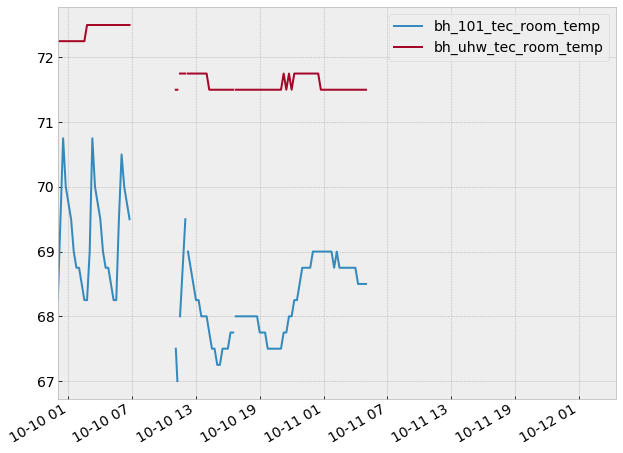

In [35]:
df[['bh_101_tec_room_temp', 'bh_uhw_tec_room_temp']].plot()

I'll address the gap problems in a moment.  Notice that you need to use double square brackets to select out particular columns in the DataFrame.  Here is how you would implement the above graph through use of Matplotlib function calls.  The values to use for the X axis are the date/times in the index of the DataFrame:

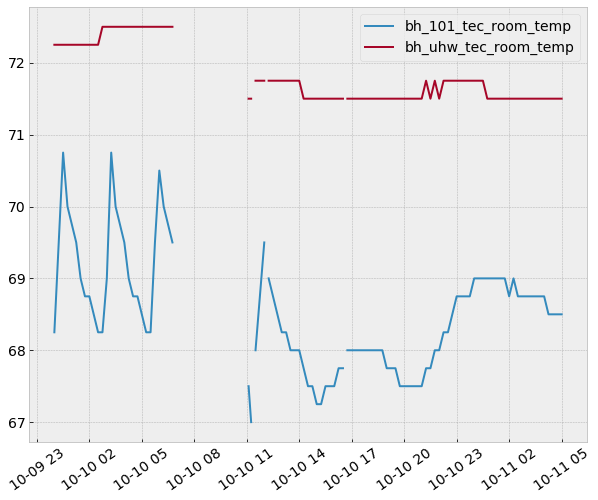

In [33]:
plt.plot(df.index, df.bh_101_tec_room_temp, label='bh_101_tec_room_temp')
plt.plot(df.index, df.bh_uhw_tec_room_temp, label='bh_uhw_tec_room_temp')
plt.xticks(rotation=35)
plt.legend()

More complicated, but sometimes you need the flexibility of Matplotlib to accomplish what you need.  So, it is good to know both methods. Also, you can mix Pandas plotting function with Matplotlib functions in the same plot. I'll stick to Pandas plotting calls for the rest of the tutorial.

### Eliminating the Gaps in the Lines